### Data engineering

In [96]:
import pandas as pd

link = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"

table = pd.read_html(link,header=0)[0]

In [97]:
table.head()

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.

In [98]:
table = table[table.Borough != "Not assigned"]

In [99]:
table.head()

,Postcode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M5A,Downtown Toronto,Regent Park
6,M6A,North York,Lawrence Heights


More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma.

In [100]:
table_agg = table.groupby(['Postcode', 'Borough'])['Neighbourhood'].apply(lambda x: "%s" % ', '.join(x))

In [101]:
table_agg.head()

Postcode  Borough    
M1B       Scarborough                            Rouge, Malvern
M1C       Scarborough    Highland Creek, Rouge Hill, Port Union
M1E       Scarborough         Guildwood, Morningside, West Hill
M1G       Scarborough                                    Woburn
M1H       Scarborough                                 Cedarbrae
Name: Neighbourhood, dtype: object

In [102]:
type(table_agg)

pandas.core.series.Series

In [103]:
table_agg.index

MultiIndex(levels=[['M1B', 'M1C', 'M1E', 'M1G', 'M1H', 'M1J', 'M1K', 'M1L', 'M1M', 'M1N', 'M1P', 'M1R', 'M1S', 'M1T', 'M1V', 'M1W', 'M1X', 'M2H', 'M2J', 'M2K', 'M2L', 'M2M', 'M2N', 'M2P', 'M2R', 'M3A', 'M3B', 'M3C', 'M3H', 'M3J', 'M3K', 'M3L', 'M3M', 'M3N', 'M4A', 'M4B', 'M4C', 'M4E', 'M4G', 'M4H', 'M4J', 'M4K', 'M4L', 'M4M', 'M4N', 'M4P', 'M4R', 'M4S', 'M4T', 'M4V', 'M4W', 'M4X', 'M4Y', 'M5A', 'M5B', 'M5C', 'M5E', 'M5G', 'M5H', 'M5J', 'M5K', 'M5L', 'M5M', 'M5N', 'M5P', 'M5R', 'M5S', 'M5T', 'M5V', 'M5W', 'M5X', 'M6A', 'M6B', 'M6C', 'M6E', 'M6G', 'M6H', 'M6J', 'M6K', 'M6L', 'M6M', 'M6N', 'M6P', 'M6R', 'M6S', 'M7A', 'M7R', 'M7Y', 'M8V', 'M8W', 'M8X', 'M8Y', 'M8Z', 'M9A', 'M9B', 'M9C', 'M9L', 'M9M', 'M9N', 'M9P', 'M9R', 'M9V', 'M9W'], ['Central Toronto', 'Downtown Toronto', 'East Toronto', 'East York', 'Etobicoke', 'Mississauga', 'North York', 'Queen's Park', 'Scarborough', 'West Toronto', 'York']],
           codes=[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 2

In [104]:
df = table_agg.reset_index()

In [105]:
type(df)

pandas.core.frame.DataFrame

In [106]:
df[df.Postcode == 'M5A']

,Postcode,Borough,Neighbourhood
53,M5A,Downtown Toronto,"Harbourfront, Regent Park"


If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough. So for the 9th cell in the table on the Wikipedia page, the value of the Borough and the Neighborhood columns will be Queen's Park.

In [107]:
df[df.Neighbourhood == 'Not assigned']

,Postcode,Borough,Neighbourhood
85,M7A,Queen's Park,Not assigned


In [108]:
df.Neighbourhood[df.Neighbourhood == 'Not assigned'] = df.Borough[df.Neighbourhood == 'Not assigned']

In [109]:
df[df.Borough == "Queen's Park"]

,Postcode,Borough,Neighbourhood
85,M7A,Queen's Park,Queen's Park


In [110]:
df.shape

(103, 3)

### Add geolocation data

Now that you have built a dataframe of the postal code of each neighborhood along with the borough name and neighborhood name, in order to utilize the Foursquare location data, we need to get the latitude and the longitude coordinates of each neighborhood.

We will use the Geocoder Python package : https://geocoder.readthedocs.io/index.html.

The problem with this Package is you have to be persistent sometimes in order to get the geographical coordinates of a given postal code. So you can make a call to get the latitude and longitude coordinates of a given postal code and the result would be None, and then make the call again and you would get the coordinates. So, in order to make sure that you get the coordinates for all of our neighborhoods, you can run a while loop for each postal code. Taking postal code M5G as an example, your code would look something like this:

In [114]:
# #!pip install geocoder

# import geocoder # import geocoder

# # initialize your variable to None
# lat_lng_coords = None

# postal_code = 'M5G'

# # loop until you get the coordinates
# while(lat_lng_coords is None):
#   g = geocoder.google('{}, Toronto, Ontario'.format(postal_code))
#   lat_lng_coords = g.latlng

# latitude = lat_lng_coords[0]
# longitude = lat_lng_coords[1]

The problem with this Package is you have to be persistent sometimes in order to get the geographical coordinates of a given postal code. So you can make a call to get the latitude and longitude coordinates of a given postal code and the result would be None, and then make the call again and you would get the coordinates. So, in order to make sure that you get the coordinates for all of our neighborhoods, you can run a while loop for each postal code. Taking postal code M5G as an example, your code would look something like this:


Given that this package can be very unreliable, in case you are not able to get the geographical coordinates of the neighborhoods using the Geocoder package, here is a link to a csv file that has the geographical coordinates of each postal code: http://cocl.us/Geospatial_data

In [117]:
geospatial_data = pd.read_csv('C:\\Users\\andreea.madalina\\Downloads\\Geospatial_Coordinates.csv')

In [118]:
geospatial_data.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [148]:
df_geo = pd.merge(df, geospatial_data, how = "left", left_on = 'Postcode', right_on ='Postal Code')
df_geo = df_geo.drop(columns = ['Postal Code'])

In [149]:
df_geo.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


### Explore and cluster the neighborhoods

Keep all boroughs

Use for clustering only Latitude and Longitude

In [150]:
df_clust = df_geo.drop(columns = ['Postcode', 'Borough', 'Neighbourhood'])

Find the optimal number of clusters using the elbow method

In [151]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_clust)
    Sum_of_squared_distances.append(km.inertia_)

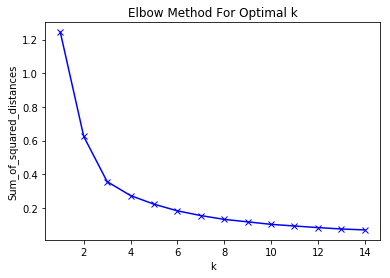

In [152]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In the plot above the elbow is at k=4 indicating the optimal k for this dataset is 4

In [153]:
# set number of clusters
kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_clust)

# check cluster labels generated for each row in the dataframe
kmeans.labels_ 

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 0, 1, 1, 1, 3, 3, 3, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 0, 3, 0,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

### Generate maps to visualize the neighborhoods and how they cluster together.

In [154]:
# add clustering labels
df_geo.insert(0, 'Cluster Labels', kmeans.labels_)

In [155]:
df_geo.head()

,Cluster Labels,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,2,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,2,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,2,M1G,Scarborough,Woburn,43.770992,-79.216917
4,2,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [160]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

address = 'Toronto'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.653963, -79.387207.


In [165]:
#!pip install folium

import folium
import numpy as np

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_geo['Latitude'], df_geo['Longitude'], df_geo['Neighbourhood'], df_geo['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters